<div style="float:left"><img width="200" src="https://github.com/ZiqiongLi/BNG_dissertation/blob/main/caf1de073343745cb82f4d747370178.jpg?raw=true" />
</div>

# 1. Import library

In [2]:
# import library
import numpy as np
import pandas as pd
import geopandas as gpd

from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 2. LAD boundary Data

<AxesSubplot:>

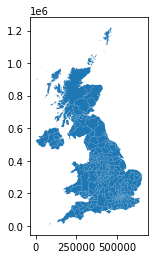

In [3]:
lad_21 = gpd.read_file('./LAD/Local_Authority_Districts_(May_2021)_UK_BFE/LAD_MAY_2021_UK_BFE_V2.shp')
lad_21.plot()

In [4]:
lad_21.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    374 non-null    int64   
 1   LAD21CD     374 non-null    object  
 2   LAD21NM     374 non-null    object  
 3   BNG_E       374 non-null    int64   
 4   BNG_N       374 non-null    int64   
 5   LONG        374 non-null    float64 
 6   LAT         374 non-null    float64 
 7   SHAPE_Leng  374 non-null    float64 
 8   SHAPE_Area  374 non-null    float64 
 9   geometry    374 non-null    geometry
dtypes: float64(4), geometry(1), int64(3), object(2)
memory usage: 29.3+ KB


In [73]:
lad_21.loc[lad_21['LAD21CD']=='E07000009']

,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry
60,61,E07000009,East Cambridgeshire,555576,275765,0.283149,52.35788,192582.753569,6.517204e+08,"POLYGON ((556824.797 293124.003, 556830.000 29..."


In [5]:
lookup = pd.read_excel('Local_Authority_Districts_(May_2021)_UK_BFE.xlsx',
                         sheet_name='Sheet2')

In [6]:
lookup

,Code,County,LAD,District
0,E10000003,Cambridgeshire,E07000008,Cambridge
1,E10000003,Cambridgeshire,E07000009,East Cambridgeshire
2,E10000003,Cambridgeshire,E07000010,Fenland
3,E10000003,Cambridgeshire,E07000011,Huntingdonshire
4,E10000003,Cambridgeshire,E07000012,South Cambridgeshire
...,...,...,...,...
176,E10000015,Hertfordshire,E07000242,East Hertfordshire
177,E10000015,Hertfordshire,E07000243,Stevenage
178,E10000029,Suffolk,E07000244,East Suffolk [note 5]
179,E10000029,Suffolk,E07000245,West Suffolk [note 6]


In [7]:
for_road = pd.merge(lad_21, lookup, left_on='LAD21CD', right_on='LAD', how='left')

In [8]:
for_road = for_road.loc[:,['LAD21CD','SHAPE_Area','Code','County']]

In [9]:
for_road

,LAD21CD,SHAPE_Area,Code,County
0,E06000001,9.835107e+07,NaN,NaN
1,E06000002,5.455359e+07,NaN,NaN
2,E06000003,2.537854e+08,NaN,NaN
3,E06000004,2.097308e+08,NaN,NaN
4,E06000005,1.974778e+08,NaN,NaN
...,...,...,...,...
369,W06000020,1.262399e+08,NaN,NaN
370,W06000021,8.860439e+08,NaN,NaN
371,W06000022,2.175180e+08,NaN,NaN
372,W06000023,5.195456e+09,NaN,NaN


In [10]:
Area_county = for_road.groupby(['Code']).agg({'SHAPE_Area':'sum'}).reset_index()
cols = Area_county.columns.values
cols[0] = 'Code'
cols[1] = 'SHAPE_Area'
Area_county.columns = cols
Area_county

,Code,SHAPE_Area
0,E10000003,3.054008e+09
1,E10000006,7.183709e+09
2,E10000007,2.550760e+09
3,E10000008,6.633246e+09
4,E10000011,1.723814e+09
5,E10000012,3.696511e+09
6,E10000013,2.704224e+09
7,E10000014,3.737255e+09
8,E10000015,1.643065e+09
9,E10000016,3.637205e+09


In [11]:
Area_county.to_csv(r'sumarea_E10.csv')

In [12]:
den = pd.read_csv('sumarea.csv')

In [13]:
den.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24 non-null     int64  
 1   County      24 non-null     object 
 2   Area        24 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 704.0+ bytes


In [14]:
den.to_csv(r'roadden.csv')

# LAD

In [16]:
polygon = gpd.read_file('./LAD/Local_Authority_Districts_(May_2021)_UK_BFE/LAD_MAY_2021_UK_BFE_V2.shp')

In [17]:
england = pd.read_excel('England_class.xlsx')
england

,LAD,LAD_Name,Country,Region,County_Code,County_Name
0,E06000001,Hartlepool,England,North East,E06000001,Hartlepool
1,E06000002,Middlesbrough,England,North East,E06000002,Middlesbrough
2,E06000003,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland
3,E06000004,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees
4,E06000005,Darlington,England,North East,E06000005,Darlington
...,...,...,...,...,...,...
345,E12000007,London,England,London,NaN,NaN
346,E12000008,South East,England,South East,NaN,NaN
347,E12000009,South West,England,South West,NaN,NaN
348,E13000001,Inner London,England,London,E13000001,Inner London


In [18]:
england_poly = pd.merge(england, polygon, left_on='LAD', right_on='LAD21CD', how='left')

In [19]:
england_poly_geo = gpd.GeoDataFrame(england_poly, crs="EPSG:27700", geometry=england_poly['geometry'])

# 3. Human population data

In [20]:
human_pop = pd.read_excel(
    './Human_pop/census2021firstresultsenglandwales1.xlsx', 
    sheet_name='P04', # Which sheet is the data in?
    header=[6])

In [21]:
human_pop.head()

,Area code [note 2],Area name,Population density (number of usual residents per square kilometre) \n[note 13]
0,K04000001,England and Wales,395
1,E92000001,England,434
2,E12000001,North East,308
3,E06000047,County Durham,235
4,E06000005,Darlington,546


In [23]:
pop = pd.merge(england_poly_geo, human_pop, left_on='LAD21CD', right_on='Area code [note 2]', how='left')

In [24]:
pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 19 columns):
 #   Column                                                                          Non-Null Count  Dtype   
---  ------                                                                          --------------  -----   
 0   LAD                                                                             350 non-null    object  
 1   LAD_Name                                                                        349 non-null    object  
 2   Country                                                                         350 non-null    object  
 3   Region                                                                          350 non-null    object  
 4   County_Code                                                                     341 non-null    object  
 5   County_Name                                                                     341 non-null    object  
 6   OB

In [27]:
pop.to_csv(r'./OUTPUT/Population_Density.csv')

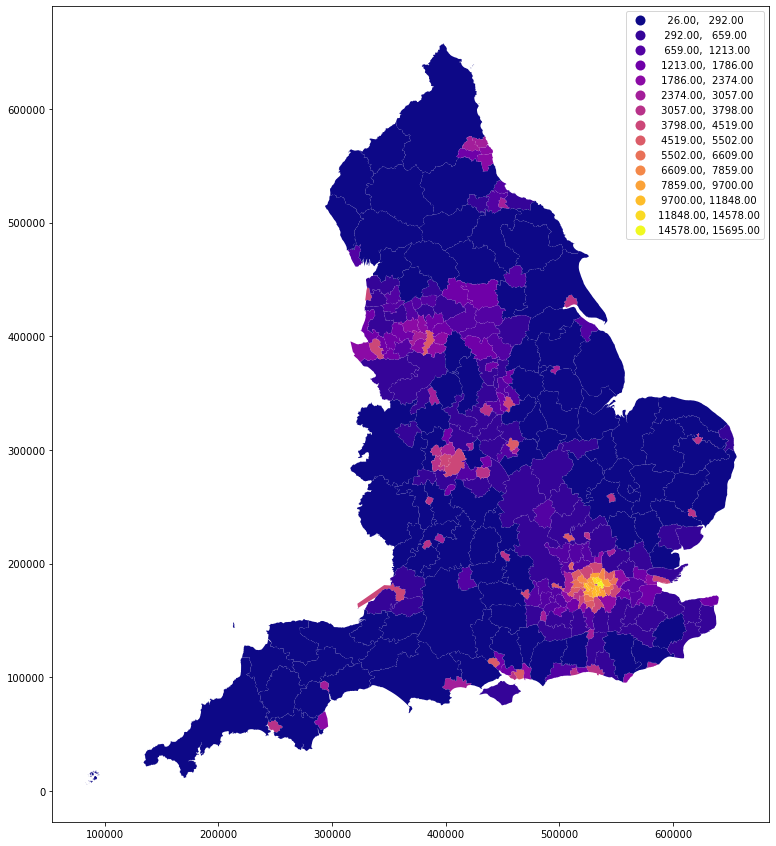

In [25]:
pop.plot(column='Population density (number of usual residents per square kilometre) \n[note 13]', cmap='plasma', 
         scheme='FisherJenks', k=15, edgecolor='None', legend=True, figsize=(15,15));

# 4. Road data

In [29]:
pip install odfpy

     |████████████████████████████████| 717 kB 5.0 MB/s eta 0:00:01
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160691 sha256=963b397f90e722a869407ffdc3c1b0ef29be5651f95d0d204dabc06ce1e37f39
  Stored in directory: /home/jovyan/.cache/pip/wheels/20/ff/69/1b3f423ffe400b87afa368c70b43d2b5cd3bfb9ac8a613ba5b
Successfully built odfpy
Note: you may need to restart the kernel to use updated packages.


In [30]:
road = pd.read_excel(
    './Urban/rdl0202.ods', 
    sheet_name='RDL0202a', # Which sheet is the data in?
    header=[6])

In [47]:
road.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ONS Area Code              206 non-null    object 
 1   Region                     206 non-null    object 
 2   Local Authority            206 non-null    object 
 3   Trunk motorways            206 non-null    float64
 4   Principal motorways        206 non-null    float64
 5   All motorways              206 non-null    float64
 6   Trunk rural 'A' roads      206 non-null    float64
 7   Trunk urban 'A' roads      206 non-null    float64
 8   Principal rural 'A' roads  206 non-null    float64
 9   Principal urban 'A' roads  206 non-null    float64
 10  All 'A' roads              206 non-null    float64
 11  Rural 'B' roads            206 non-null    float64
 12  Urban 'B' roads            206 non-null    float64
 13  Rural 'C' and 'U' roads    206 non-null    float64

In [31]:
road_den = pd.merge(road, pop, left_on='ONS Area Code', right_on='LAD21CD', how='left')

In [32]:
road_den_E07 = pd.merge(road, Area_county, left_on='ONS Area Code', right_on='Code', how='left')

In [33]:
road_den = road_den.loc[:,['ONS Area Code','Local Authority','Total road length ', 'LAD21CD','SHAPE_Area']]

In [34]:
road_den.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 205
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ONS Area Code       206 non-null    object 
 1   Local Authority     206 non-null    object 
 2   Total road length   206 non-null    float64
 3   LAD21CD             128 non-null    object 
 4   SHAPE_Area          128 non-null    float64
dtypes: float64(2), object(3)
memory usage: 9.7+ KB


In [35]:
road_den['density'] = road_den['Total road length ']/road_den['SHAPE_Area']

In [36]:
road_den_E07

,ONS Area Code,Region,Local Authority,Trunk motorways,Principal motorways,All motorways,Trunk rural 'A' roads,Trunk urban 'A' roads,Principal rural 'A' roads,Principal urban 'A' roads,...,Urban 'B' roads,Rural 'C' and 'U' roads,Urban 'C' and 'U' roads,All minor roads,Major trunk roads,Major principal roads,Minor roads,Total road length,Code,SHAPE_Area
0,E06000047,North East,County Durham UA,36.8,0.0,36.8,42.3,1.0,324.0,44.2,...,42.5,1933.7,968.9,3304.5,80.1,368.2,3304.5,3752.8,NaN,NaN
1,E06000005,North East,Darlington UA,9.5,0.0,9.5,12.4,0.4,36.3,15.9,...,9.2,182.9,276.6,488.7,22.3,52.2,488.7,563.2,NaN,NaN
2,E06000001,North East,Hartlepool UA,0.0,0.0,0.0,8.4,0.0,22.3,17.3,...,7.0,64.4,292.2,365.6,8.4,39.6,365.6,413.6,NaN,NaN
3,E06000002,North East,Middlesbrough UA,0.0,0.0,0.0,9.2,5.3,7.6,26.3,...,10.2,38.7,435.2,492.1,14.5,33.9,492.1,540.5,NaN,NaN
4,E06000057,North East,Northumberland UA,0.0,0.0,0.0,163.7,0.8,410.6,33.7,...,30.4,3283.3,601.9,4527.3,164.5,444.3,4527.3,5136.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,S12000028,Scotland [Note 2],South Ayrshire,0.0,0.0,0.0,84.0,10.8,79.2,29.2,...,26.6,513.2,394.8,1112.7,94.8,108.4,1112.7,1315.9,NaN,NaN
202,S12000029,Scotland [Note 2],South Lanarkshire,73.1,0.0,73.1,35.9,14.4,190.2,69.3,...,51.0,837.5,1107.0,2166.0,123.4,259.5,2166.0,2548.9,NaN,NaN
203,S12000030,Scotland [Note 2],Stirling,22.8,0.0,22.8,102.6,4.7,169.3,39.2,...,23.1,391.4,304.4,854.2,130.1,208.5,854.2,1192.8,NaN,NaN
204,S12000039,Scotland [Note 2],West Dunbartonshire,0.0,0.0,0.0,11.5,8.3,13.9,31.6,...,8.6,48.3,301.6,358.7,19.8,45.5,358.7,424.0,NaN,NaN


In [37]:
road_den_E07 = road_den_E07.loc[:,['ONS Area Code','Local Authority','Total road length ', 'Code','SHAPE_Area']]

In [38]:
road_den_E07['density'] = road_den_E07['Total road length ']/road_den_E07['SHAPE_Area']

In [39]:
road_den_E07.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ONS Area Code       206 non-null    object 
 1   Local Authority     206 non-null    object 
 2   Total road length   206 non-null    float64
 3   Code                24 non-null     object 
 4   SHAPE_Area          24 non-null     float64
 5   density             24 non-null     float64
dtypes: float64(3), object(3)
memory usage: 11.3+ KB


In [40]:
road_den['density'].fillna(road_den_E07['density'], inplace=True)

In [41]:
road_den.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ONS Area Code       206 non-null    object 
 1   Local Authority     206 non-null    object 
 2   Total road length   206 non-null    float64
 3   LAD21CD             128 non-null    object 
 4   SHAPE_Area          128 non-null    float64
 5   density             152 non-null    float64
dtypes: float64(3), object(3)
memory usage: 11.3+ KB


In [42]:
road_density = pd.merge(for_road, road_den, left_on='LAD21CD', right_on='ONS Area Code', how='left')

In [43]:
road_density = pd.merge(road_density, road_den, left_on='Code', right_on='ONS Area Code', how='left')

In [44]:
road_density['density_x'].fillna(road_density['density_y'], inplace=True)

In [45]:
road_density.loc[road_density['LAD21CD_x']=='E07000010']

,LAD21CD_x,SHAPE_Area_x,Code,County,ONS Area Code_x,Local Authority_x,Total road length _x,LAD21CD_y,SHAPE_Area_y,density_x,ONS Area Code_y,Local Authority_y,Total road length _y,LAD21CD,SHAPE_Area,density_y
61,E07000010,5.473554e+08,E10000003,Cambridgeshire,NaN,NaN,NaN,NaN,NaN,0.000002,E10000003,Cambridgeshire,4848.1,NaN,NaN,0.000002


In [46]:
road_density_final = road_density.loc[:,['LAD21CD_x','SHAPE_Area_x','density_x']]
cols = road_density_final.columns.values
cols[0] = 'LAD21CD'
cols[1] = 'SHAPE_Area'
cols[2] = 'road_density'
road_density_final.columns = cols
road_density_final

,LAD21CD,SHAPE_Area,road_density
0,E06000001,9.835107e+07,0.000004
1,E06000002,5.455359e+07,0.000010
2,E06000003,2.537854e+08,0.000003
3,E06000004,2.097308e+08,0.000004
4,E06000005,1.974778e+08,0.000003
...,...,...,...
369,W06000020,1.262399e+08,NaN
370,W06000021,8.860439e+08,NaN
371,W06000022,2.175180e+08,NaN
372,W06000023,5.195456e+09,NaN


In [136]:
road_density_final.to_csv('road_density_final.csv')

In [47]:
Road = pd.merge(england_poly_geo, road_density_final, left_on='LAD21CD', right_on='LAD21CD', how='left')

In [48]:
Road

,LAD,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area_x,geometry,SHAPE_Area_y,road_density
0,E06000001,Hartlepool,England,North East,E06000001,Hartlepool,1.0,E06000001,Hartlepool,447160.0,531474.0,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53...",9.835107e+07,0.000004
1,E06000002,Middlesbrough,England,North East,E06000002,Middlesbrough,2.0,E06000002,Middlesbrough,451141.0,516887.0,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52...",5.455359e+07,0.000010
2,E06000003,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland,3.0,E06000003,Redcar and Cleveland,464361.0,519597.0,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52...",2.537854e+08,0.000003
3,E06000004,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52...",2.097308e+08,0.000004
4,E06000005,Darlington,England,North East,E06000005,Darlington,5.0,E06000005,Darlington,428029.0,515648.0,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52...",1.974778e+08,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,E12000007,London,England,London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
346,E12000008,South East,England,South East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
347,E12000009,South West,England,South West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
348,E13000001,Inner London,England,London,E13000001,Inner London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN


In [50]:
Road.drop(columns = ['SHAPE_Area_y'])

,LAD,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area_x,geometry,road_density
0,E06000001,Hartlepool,England,North East,E06000001,Hartlepool,1.0,E06000001,Hartlepool,447160.0,531474.0,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53...",0.000004
1,E06000002,Middlesbrough,England,North East,E06000002,Middlesbrough,2.0,E06000002,Middlesbrough,451141.0,516887.0,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52...",0.000010
2,E06000003,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland,3.0,E06000003,Redcar and Cleveland,464361.0,519597.0,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52...",0.000003
3,E06000004,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52...",0.000004
4,E06000005,Darlington,England,North East,E06000005,Darlington,5.0,E06000005,Darlington,428029.0,515648.0,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52...",0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,E12000007,London,England,London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
346,E12000008,South East,England,South East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
347,E12000009,South West,England,South West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
348,E13000001,Inner London,England,London,E13000001,Inner London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [52]:
Road.to_csv(r'./OUTPUT/Road_Density.csv')

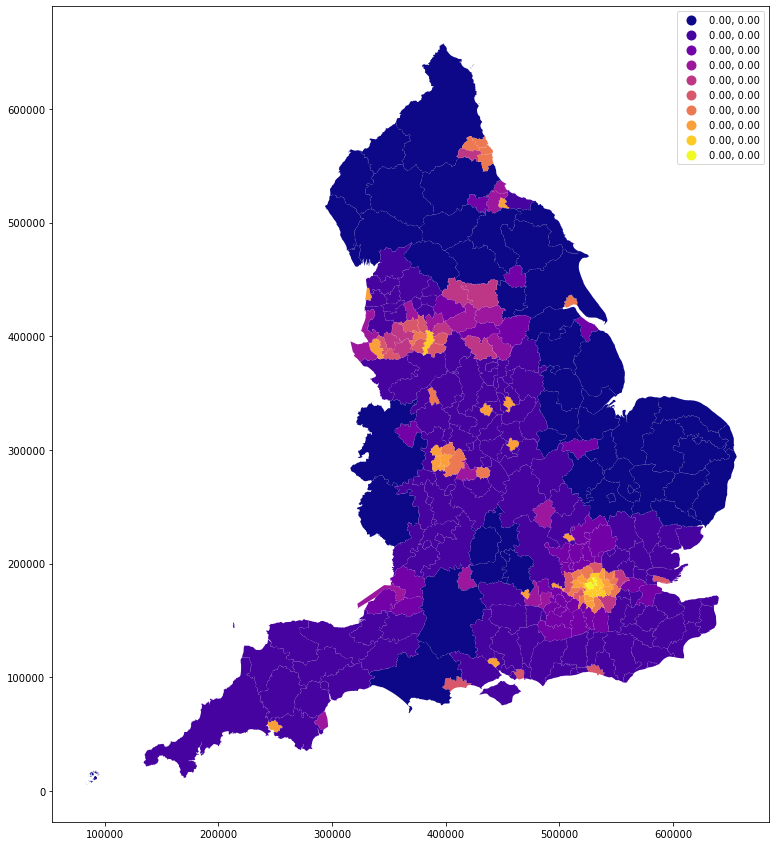

In [51]:
Road.plot(column='road_density', cmap='plasma', 
         scheme='FisherJenks', k=10, edgecolor='None', legend=True, figsize=(15,15));